In [1]:
# Install system dependencies
!apt-get update && apt-get install -y \
    python3-dev \
    swig \
    python3-pygame \
    libsdl2-dev \
    libjpeg-dev \
    zlib1g-dev

# Install Python packages
!pip install "pettingzoo[atari]==1.24.3" gymnasium[atari] numpy pygame

# Install and setup AutoROM
!pip install autorom
!AutoROM --accept-license

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,230 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,606 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main

In [2]:
!pip install git+https://github.com/ml-arena/pong2024.git

  Cloning https://github.com/ml-arena/pong2024.git to /tmp/pip-req-build-3zr3qle9
  Running command git clone --filter=blob:none --quiet https://github.com/ml-arena/pong2024.git /tmp/pip-req-build-3zr3qle9
  Resolved https://github.com/ml-arena/pong2024.git to commit 7d154e88b448cb5623cc6870a714ab18c068c49c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.6 MB/s eta 0:00:00
 

# Overview

In [3]:
import numpy as np
from pettingzoo.atari import pong_v3
import time

### 1. Environment Overview

### Environment Creation and Reset
```python
env = pong_v3.env()  # Create the environment
env.reset()          # Reset the environment to initial state
```

### Key Properties
- `env.agents`: List of active agents in the environment
- `env.action_space(agent)`: Action space for specific agent
- `env.observation_space(agent)`: Observation space for specific agent

### Environment Interaction Methods

#### env.last()
Returns tuple of `(observation, reward, terminated, truncated, info)`
- `observation`: NumPy array (210, 160, 3) representing game state
- `reward`: Float value indicating reward from last action
- `terminated`: Boolean indicating if episode ended naturally
- `truncated`: Boolean indicating if episode was artificially terminated
- `info`: Dictionary with additional information

#### env.step(action)
- Takes an action for the current agent
- Actions must be valid for the current agent's action space
- Automatically handles agent cycling

#### env.agent_iter()
- Iterator that cycles through active agents
- Typically used in the main game loop
- Returns the current agent's name

### Environment Management
```python
env.close()  # Clean up environment resources
```

## Observation Space Details
- Shape: (210, 160, 3)
  - Height: 210 pixels
  - Width: 160 pixels
  - Channels: 3 (RGB)
- Values: 0-255 (uint8)
- Each observation is a complete frame of the game

## Action Space Details
- Type: Discrete(6)
- Actions:
  - 0: No operation
  - 1: Fire
  - 2: Move right
  - 3: Move left
  - 4: Fire right
  - 5: Fire left

Creating Pong Environment...

Environment Information:
Agents: ['first_0', 'second_0']
Action Space: Discrete(6)
Observation Space: Box(0, 255, (210, 160, 3), uint8)

Observation Details for first_0:
Shape: (210, 160, 3)
Value range: [0, 236]
Reward: 0
Game Status - Terminated: False, Truncated: False
Additional Info: {}


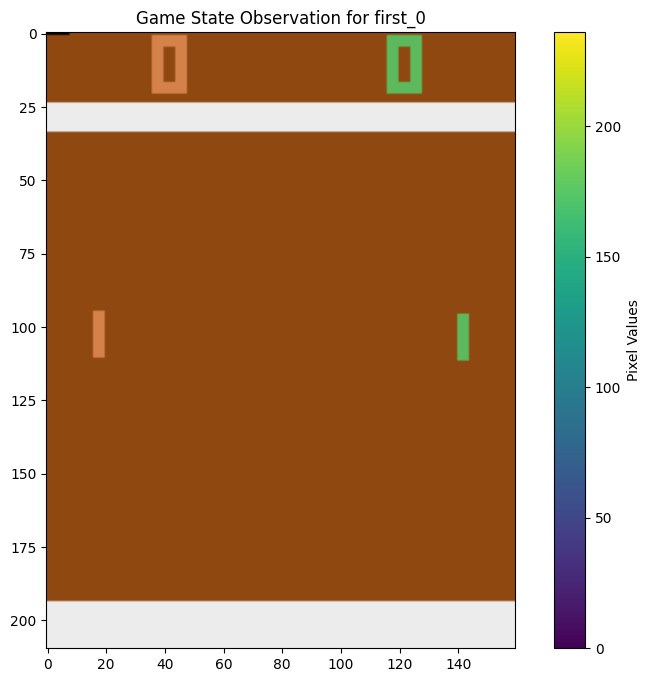

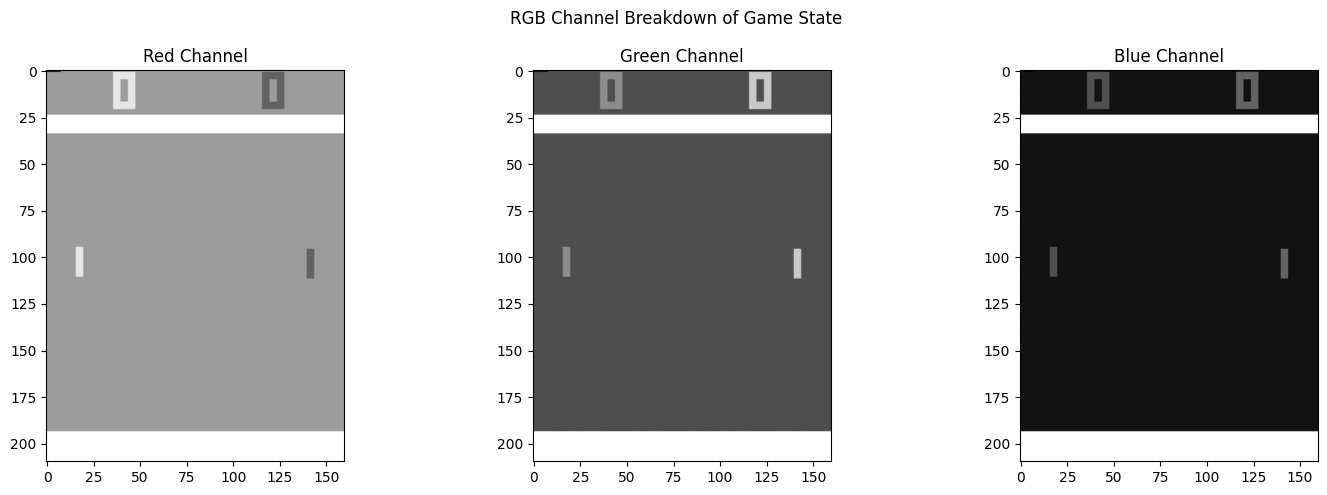

In [4]:
import matplotlib.pyplot as plt
from pettingzoo.atari import pong_v3

# Create and initialize the environment
print("Creating Pong Environment...")
env = pong_v3.env()
env.reset()

# Display environment information
print("\nEnvironment Information:")
print(f"Agents: {env.agents}")
print(f"Action Space: {env.action_space('first_0')}")
print(f"Observation Space: {env.observation_space('first_0')}")

# Get the initial observation for the first agent
observation, reward, terminated, truncated, info = env.last()
agent = env.agents[0]  # Get the first agent

print(f"\nObservation Details for {agent}:")
print(f"Shape: {observation.shape}")
print(f"Value range: [{observation.min()}, {observation.max()}]")
print(f"Reward: {reward}")
print(f"Game Status - Terminated: {terminated}, Truncated: {truncated}")
print(f"Additional Info: {info}")

# Visualize the observation
plt.figure(figsize=(10, 8))
plt.imshow(observation)
plt.title(f'Game State Observation for {agent}')
plt.axis('on')
plt.colorbar(label='Pixel Values')
plt.show()

# Show RGB channels separately
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f'RGB Channel Breakdown of Game State')

channels = ['Red', 'Green', 'Blue']
for i, (ax, channel) in enumerate(zip(axes, channels)):
    ax.imshow(observation[:, :, i], cmap='gray')
    ax.set_title(f'{channel} Channel')
    ax.axis('on')

plt.tight_layout()
plt.show()

env.close()

### 2. Agent Implementation

In [5]:
class Agent:
    """Base Agent class for Pong competition."""
    def __init__(self, env, player_name=None):
        self.env = env
        self.player_name = player_name

    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        """Choose an action based on the current game state."""
        return self.env.action_space(self.player_name).sample()

    def learn(self):
        """Learning method - to be implemented by specific agents."""
        pass

class AgentAlwaysLeft(Agent):
    """Agent that always moves left."""
    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        """Always choose the 'move left' action (3)."""
        return 3

### 3. Running a Simple Match

In [6]:
def run_match(env, agent1, agent2, max_cycles=500):
    """
    Run a match between two agents and return their cumulative rewards.

    Args:
        env: The game environment
        agent1: First agent
        agent2: Second agent
        max_cycles: Maximum number of cycles before forcing end of game

    Returns:
        tuple: (agent1_reward, agent2_reward) - Cumulative rewards for both agents
    """
    env.reset()

    # Assign player names to agents
    agent1.player_name = env.agents[0]
    agent2.player_name = env.agents[1]

    # Initialize reward tracking
    cumulative_rewards = {
        agent1.player_name: 0,
        agent2.player_name: 0
    }
    nb_step = 0

    for agent in env.agent_iter():
        observation, reward, terminated, truncated, info = env.last()

        # Update cumulative rewards
        cumulative_rewards[agent] += reward

        if terminated or truncated:
            action = None
        else:
            # Choose action based on which agent's turn it is
            if agent == agent1.player_name:
                action = agent1.choose_action(observation, reward, terminated, truncated, info)
            else:
                action = agent2.choose_action(observation, reward, terminated, truncated, info)

        env.step(action)
        nb_step += 1

        if terminated or truncated or nb_step > max_cycles:
            break

    env.close()
    return cumulative_rewards[agent1.player_name], cumulative_rewards[agent2.player_name]

# Create environment and agents
env = pong_v3.env()
random_agent = Agent(env)
always_left_agent = AgentAlwaysLeft(env)

print("\nRunning match: Random Agent vs Always Left Agent")
agent1_reward, agent2_reward = run_match(env, random_agent, always_left_agent)
print(f"Random Agent reward: {agent1_reward}")
print(f"Always Left Agent reward: {agent2_reward}")


Running match: Random Agent vs Always Left Agent
Random Agent reward: 1
Always Left Agent reward: -1


# Evaluate

In [7]:
import numpy as np
from pettingzoo.atari import pong_v3
from typing import Dict, List, Tuple, Type
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Import evaluation function
from pong2024.eval.evaluate_against_multiple_agents import evaluate_against_multiple_agents, visualize_multiple_matchups


# Define example agents for testing
class YourAgent:
    """Example of a custom agent - currently just random actions."""
    def __init__(self, env, player_name=None):
        self.env = env
        self.player_name = player_name

    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        """Choose action randomly."""
        return self.env.action_space(self.player_name).sample()

class AlwaysLeftAgent:
    """Agent that always moves left."""
    def __init__(self, env, player_name=None):
        self.env = env
        self.player_name = player_name

    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        """Always choose move left action (3)."""
        return 3

class AlwaysRightAgent:
    """Agent that always moves right."""
    def __init__(self, env, player_name=None):
        self.env = env
        self.player_name = player_name

    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        """Always choose move right action (2)."""
        return 2

# Create environment
env = pong_v3.env()

# Define list of opponent agents to evaluate against
opponent_agents = [
    AlwaysLeftAgent,   # Deterministic opponent - always moves left
    AlwaysRightAgent,  # Deterministic opponent - always moves right
    YourAgent          # Random opponent
]

print("Starting evaluation against multiple opponents...")

# Run evaluation against all opponents
results = evaluate_against_multiple_agents(
    env=env,
    main_agent_class=YourAgent,        # Your agent to evaluate
    opponent_classes=opponent_agents,   # List of opponents
    n_games_per_matchup=10,            # Number of games per opponent
    max_cycles=100,                  # Maximum steps per game
    seed=42,                            # For reproducibility
    n_verbose_game=1
)

# Print summary results
print("\nEvaluation Summary:")
print(f"Overall win rate: {results['summary']['main_agent_overall_winrate']:.1%}")
print(f"Average score: {results['summary']['main_agent_average_score']:.1f}")

print("\nPerformance against each opponent:")
for matchup in results['matchups']:
    print(f"\nVs {matchup['opponent_class']}:")
    print(f"Win rate: {matchup['main_agent_winrate']:.1%}")
    print(f"Average score: {matchup['main_agent_avg_score']:.1f}")


Starting evaluation against multiple opponents...

Starting evaluation of YourAgent against 3 opponents
--------------------------------------------------------------------------------

Testing against Opponent 1/3: AlwaysLeftAgent
Playing game 1/10
Playing game 2/10
Playing game 3/10
Playing game 4/10
Playing game 5/10
Playing game 6/10
Playing game 7/10
Playing game 8/10
Playing game 9/10
Playing game 10/10

Matchup Summary vs AlwaysLeftAgent:
Wins: 0
Draws: 10
Losses: 0
Win Rate: 0.00%
Draw Rate: 100.00%
Loss Rate: 0.00%

Testing against Opponent 2/3: AlwaysRightAgent
Playing game 1/10
Playing game 2/10
Playing game 3/10
Playing game 4/10
Playing game 5/10
Playing game 6/10
Playing game 7/10
Playing game 8/10
Playing game 9/10
Playing game 10/10

Matchup Summary vs AlwaysRightAgent:
Wins: 0
Draws: 10
Losses: 0
Win Rate: 0.00%
Draw Rate: 100.00%
Loss Rate: 0.00%

Testing against Opponent 3/3: YourAgent
Playing game 1/10
Playing game 2/10
Playing game 3/10
Playing game 4/10
Playing ga

In [ ]:

visualize_multiple_matchups(results)

# Feature Engineering

The raw observation from the Pong environment (210, 160, 3) is quite large and complex,
containing a lot of unnecessary information. We can make learning easier by:

1. Dimension Reduction:
   - Extract play area (removing score/info areas)
   - Convert to grayscale (remove color channels)
   - Resize to smaller dimensions

2. Player Perspective Normalization:
   - The game looks different for player 1 vs player 2
   - Flipping the image for player 2 makes both perspectives similar (but action should be reverse)
   - This helps the agent learn a single strategy for both sides

3. Image Processing:
   - Gaussian smoothing reduces noise
   - Binary thresholding separates objects clearly
   - Normalization scales values to [0,1]

4. Temporal Features:
   - Pong is a dynamic environment
   - Consider using frame differences to capture motion
   - Stack multiple frames to provide temporal context
   - Apply same preprocessing to difference frames
5. Extract more specific information

In [23]:

import numpy as np

def collect_game_observations(steps):
    """Collect observations at specified steps using agent iteration."""
    env = pong_v3.env()
    env.reset()

    observations = []
    nb_step = 0

    for agent in env.agent_iter():
        observation, reward, terminated, truncated, info = env.last()

        if nb_step in steps:
            observations.append(observation)

        # If the agent is terminated, pass None as the action
        if terminated or truncated:
            action = None
        else:
            action = env.action_space(agent).sample()

        env.step(action)

        nb_step += 1


    env.close()
    return observations

In [24]:
from pong2024.feature_engineering.feature_engineering import simplified_preprocess_image

def visualize_preprocessing_steps(observation):
    """
    Visualize preprocessing steps: Original -> Play Area -> Grayscale -> Binary
    """
    plt.figure(figsize=(16, 4))

    # Original
    plt.subplot(1, 4, 1)
    plt.imshow(observation)
    plt.title('Original')
    plt.axis('on')

    # Play area
    y_bottom, y_top = 34, 194
    play_area = observation[y_bottom:y_top, :, :]
    plt.subplot(1, 4, 2)
    plt.imshow(play_area)
    plt.title('Play Area')
    plt.axis('on')

    # Grayscale
    gray = cv2.cvtColor(play_area, cv2.COLOR_RGB2GRAY)
    plt.subplot(1, 4, 3)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('on')

    # Binary (0,1)
    processed = simplified_preprocess_image(observation)
    plt.subplot(1, 4, 4)
    plt.imshow(processed, cmap='binary')
    plt.title('Binary')
    plt.axis('on')

    # Verify binary values
    unique_values = np.unique(processed)
    print(f"Unique values in binary output: {unique_values}")

    plt.tight_layout()
    plt.show()

    return


Observation 50:
Unique values in binary output: [0 1]


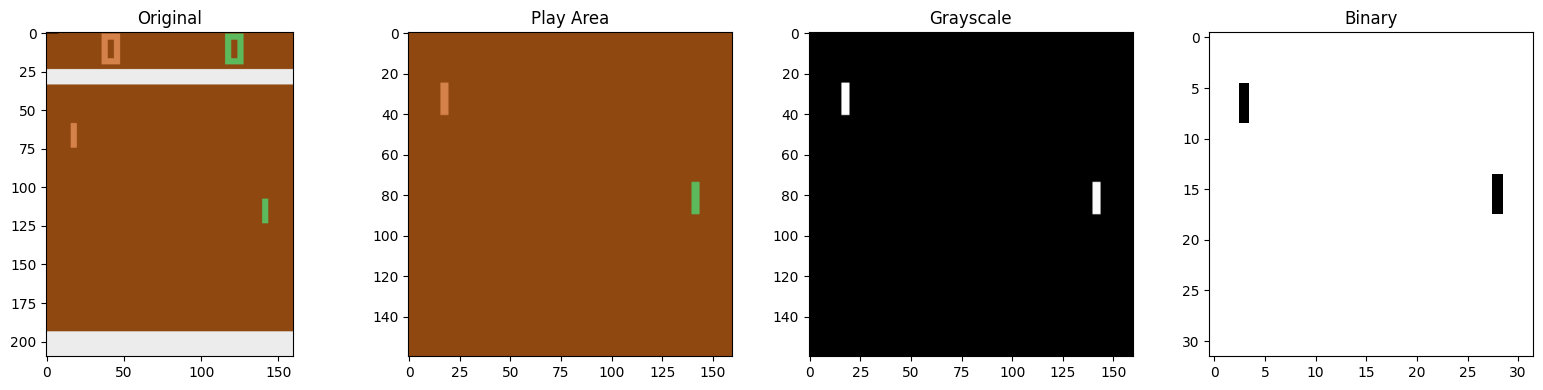


Observation 150:
Unique values in binary output: [0 1]


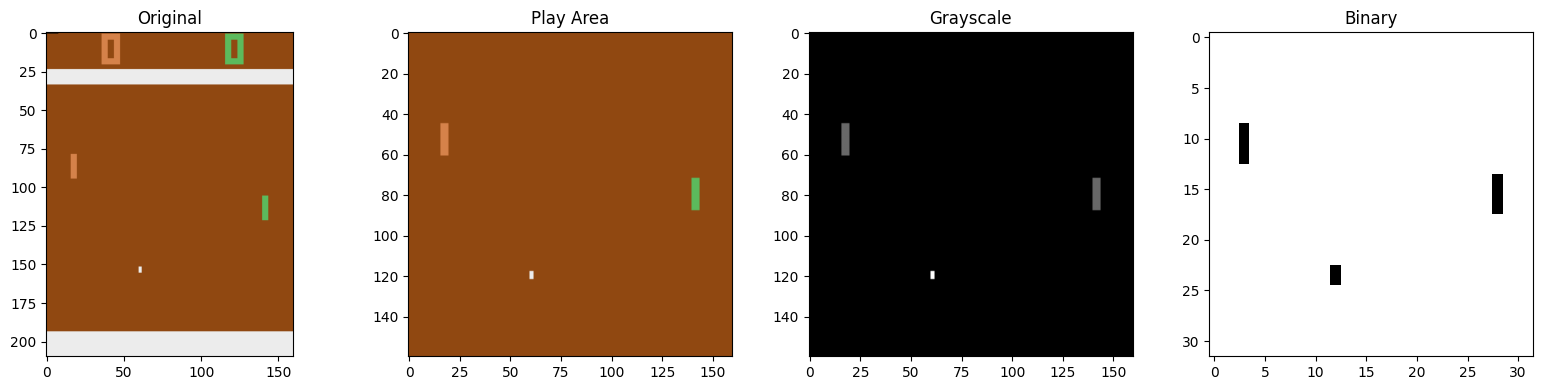


Observation 222:
Unique values in binary output: [0 1]


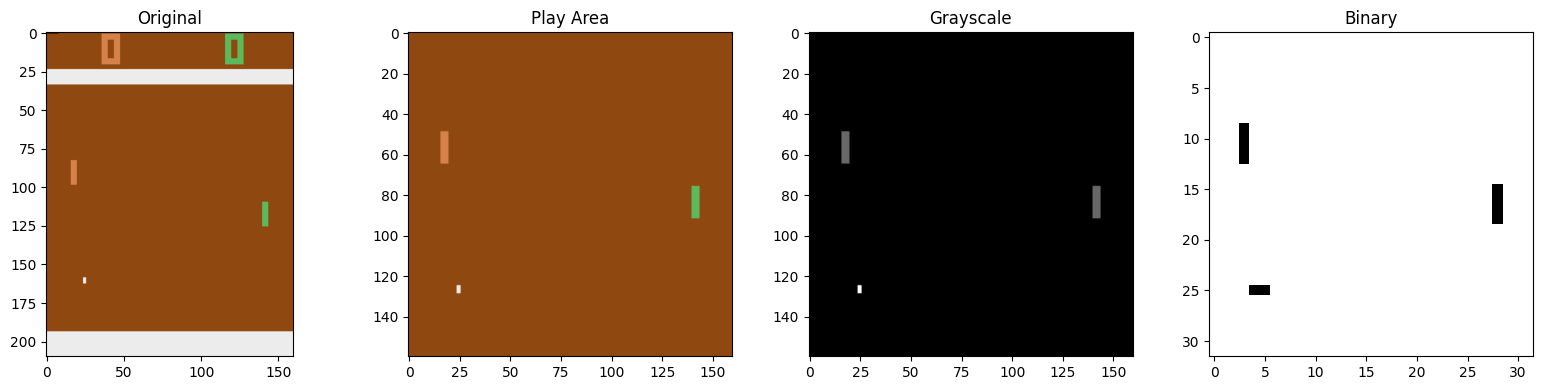

In [25]:
steps = [50,150,222]
# Collect multiple observations
observations = collect_game_observations(steps=steps)

# Visualize preprocessing steps for each observation
for i, obs in enumerate(observations):
    print(f"\nObservation {steps[i]}:")
    gray = visualize_preprocessing_steps(obs)

# Train

In [ ]:
class RandomAgent:
    """Base Agent class for Pong competition."""
    def __init__(self, env, player_name=None):
        self.env = env
        self.player_name = player_name

    def choose_action(self, observation, reward=0.0, terminated=False, truncated=False, info=None):
        """Choose an action based on the current game state."""
        return self.env.action_space(self.player_name).sample()

    def learn(self):
        """Learning method - to be implemented by specific agents."""
        pass

In [ ]:
#Done: write deep Q learning update
class DeepQAgent():
    def __init__(self, env, model: nn.Module, gamma = .99, epsilon = .1):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.state_dim = env.observation_space.shape[0]
        self.action_dim = env.action_space.n
        self.model = model 
        # Initialize loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-2)
    
    def choose_action(self, state: np.ndarray) -> int:
        """
        Choose an action using epsilon-greedy policy.
        
        Args:
            state (np.ndarray): Current state observation
            
        Returns:
            int: Selected action
        """
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.action_space.n)
        else:
            state_tensor = torch.FloatTensor(state.reshape(1, -1))
            with torch.no_grad():
                q_values = self.model(state_tensor)
            return q_values.argmax().item()
    
    def train(self, current_state, action, reward, next_state, done):
        """
        Train the Q-network on a single transition.
        
        Args:
            current_state: The current state
            action: The action taken
            reward: The reward received
            next_state: The next state
            done: Whether the episode is done
        """
        # Convert inputs to tensors and ensure proper shapes
        current_state = np.array(current_state, dtype=np.float32)
        next_state = np.array(next_state, dtype=np.float32)
        
        if len(current_state.shape) == 1:
            current_state = current_state.reshape(1, -1)
        if len(next_state.shape) == 1:
            next_state = next_state.reshape(1, -1)
            
        current_state_tensor = torch.FloatTensor(current_state)
        next_state_tensor = torch.FloatTensor(next_state)
        action_tensor = torch.LongTensor([action])
        reward_tensor = torch.FloatTensor([reward])
        done_tensor = torch.FloatTensor([done])

        # Compute current Q-value
        self.model.train()  # Set to training mode
        current_q_values = self.model(current_state_tensor)
        current_q_value = current_q_values.gather(1, action_tensor.unsqueeze(1)).squeeze(1)

        # Compute next Q-value
        with torch.no_grad():
            next_q_values = self.model(next_state_tensor)
            max_next_q_value = next_q_values.max(1)[0]

        # Compute target Q-value
        target_q_value = reward_tensor + (1 - done_tensor) * self.gamma * max_next_q_value

        # Compute loss and update weights
        loss = self.criterion(current_q_value, target_q_value)
        
        # Zero gradients, perform backward pass, and update weights
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()

In [ ]:
# Training setup
def make_env():
    return pong_v3.env()

# Define opponents with their probabilities
opponent_classes = [RandomAgent, AlwaysLeftAgent]
opponent_probs = [0.9, 0.1]  # 90% Random, 10% AlwaysLeft

# Train the agent
print("Starting training...")
results = train_sequential(
    make_env=make_env,
    main_agent_class=QAgent,
    opponent_classes=opponent_classes,
    opponent_probs=opponent_probs,
    n_total_episodes=10000,  # Total training episodes
    eval_frequency=10,      # Evaluate every 100 episodes
    max_cycles=10000         # Max steps per episode
)
